## DEMO: Harmonic Oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, interactive

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Eigenfunctions and eigenvalues of Harmonic oscillator (HO) problem

- The **eigenfunctions** of HO are expressed in terms of Hermite polynomials $H_v(x)$, special functions well known in mathematical physics. 

$$\psi(x) = N_v \cdot H_v(x) \cdot e^{-x^2/2}$$

- The $N_v = (\sqrt{\pi} 2^v v!)^{-1/2}$ is a **normalization factor.**

- The **eigenvalues** are a simple function of quantum number v:

$$E(v)= h\nu \Big (v+\frac{1}{2}\Big)$$

### Hermite polynomials

- Definition:

$$H_v(x) = (-1)^v (e^{x^2})\frac{d^v}{dx^v} (e^{-x^2})$$

- Recursion relation:

$$x H_v(x) = v H_{v-1}+\frac{1}{2} H_{v+1}(x)$$

| Table of first eight of Hermite polynomials $H_v(x)$ |
| :--------------------------------------------------: |
|                       $H_0=1$                        |
|                       $H_1=2x$                       |
|                     $H_2=4x^2-2$                     |
|                    $H_3=8x^3-12$                     |
|                 $H_4=16x^4-48x^2+12$                 |
|               $H_5=32x^5-160x^3+120 x$               |
|            $H_6=64x^6-480x^4+720 x^2-120$            |
|         $H_7=128x^7-1344 x^5+3360 x^3-1680x$         |

### Plotting hermite polynomials using scipy and numpy and matplotlib

The scipy.special has large collection of special functions inclduing hermite polynomials! While polynomials listed in the table are simple enough to hand type we are going to be lazy and use **scipy.special.hermite** wich provides us with polynomials of any degree to use in numerical calculations!

In [5]:
# Import hermite polynomials and factorial to use in normalization factor
from scipy.special import hermite, factorial

#Check to see if they match the table
H=hermite(4)
print(H)

    4      2
16 x - 48 x - 8.882e-16 x + 12


Now let us plot hermite polynomials $H_v(x)$ on some range of values x, 

Text(0, 0.5, '$H_n(x)$')

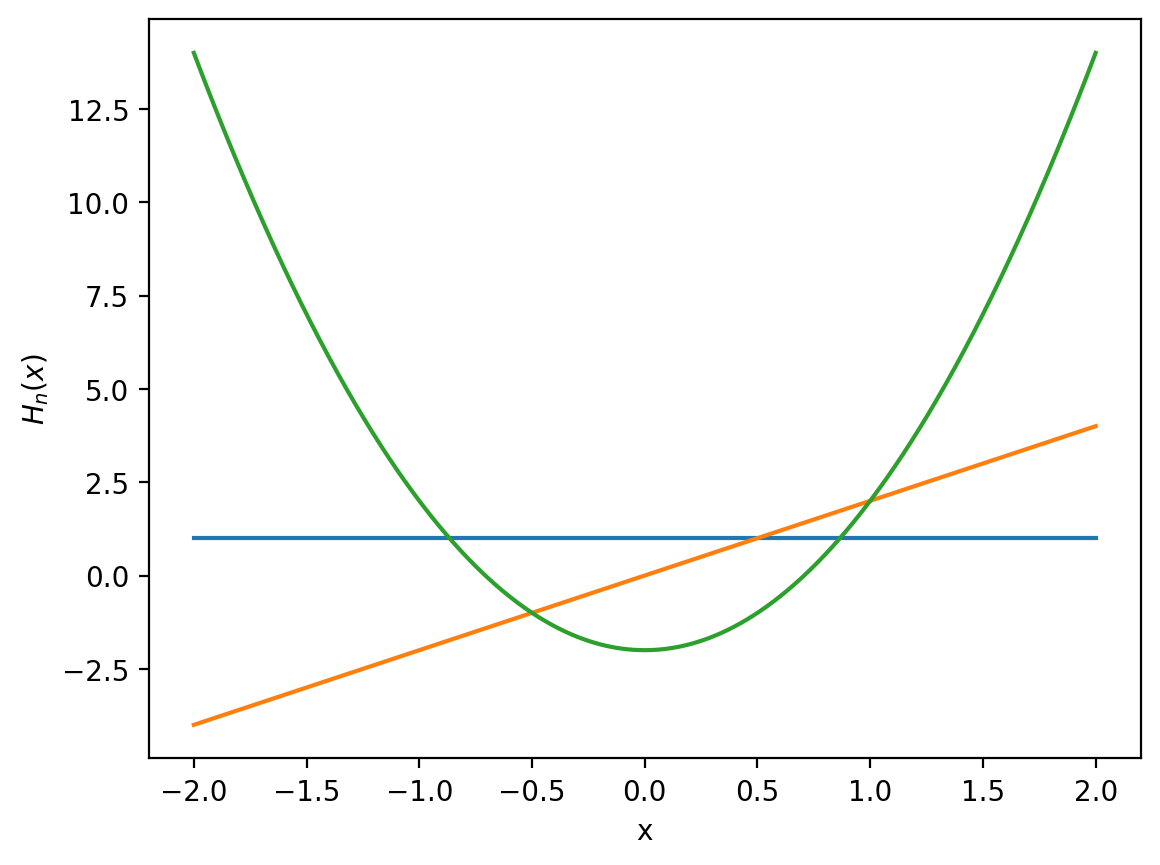

In [33]:
x=np.linspace(-2,2,1000) # Range needs to be specified for plotting functions of x

for v in range(0,3):
    
    H=hermite(v)
    
    f=H(x)
    
    plt.plot(x,f)

plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')

### Harmonic Oscillator wave functions

Now we can write down harmonic oscillator wave functions which are product of Hermite polynomials with a gaussian function and normalization factor:

$$\psi_v(x) = N_v H_v(x) e^{-x^2/2} $$

In [31]:
def harmonic_wavefunc(n, k, x):
    hbar, m_e = 1, 1
    
    # Define omega from spring constant
    omega = np.sqrt(k/m_e)  # Here we assume electron mass for simplicity
    
    # Define normalization constant
    alpha = np.sqrt(m_e * omega / hbar)
    normalization = np.sqrt(alpha / np.sqrt(np.pi) * (1.0 / (2**n * np.math.factorial(n))))
    
    # Compute the Hermite polynomial part
    herm_part = hermite(n)(alpha * x)
    
    # Compute the exponential part
    exp_part = np.exp(-0.5 * (alpha * x)**2)
    
    return normalization * herm_part * exp_part

In [34]:
# Check orthogonality

harmonic_wavefunc(n=1, k=1, x=x) @ harmonic_wavefunc(n=2, k=1, x=x)

/tmp/ipykernel_28630/2992488118.py:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  normalization = np.sqrt(alpha / np.sqrt(np.pi) * (1.0 / (2**n * np.math.factorial(n))))


-1.2490009027033011e-15

In [35]:
# Normalization is computed by using numerical integration with trapezoidal method:
from scipy.integrate import trapz

# remember that x runs form -inf to +inf so lets use large xmin and xmax
x=np.linspace(-10,10,1000)

psi2=harmonic_wavefunc(n=5, k=1, x=x)**2

Integral = trapz(psi2, x)

print(Integral)

1.0000000000000009


/tmp/ipykernel_28630/2992488118.py:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  normalization = np.sqrt(alpha / np.sqrt(np.pi) * (1.0 / (2**n * np.math.factorial(n))))


### Plot Eigenvalues and eigenfunctions of harmonic oscillator

In [29]:
def plot_wavefunc(k):

    hbar, m_e = 1, 1
    x = np.linspace(-2, 2, 1000)  # range of x values

    # Plot the potential
    V = 0.5 * k * x**2
    plt.plot(x, V, 'k-', label='Potential V(x)', linewidth=1.5)

    # Plotting the first three states
    for n in range(3):  

        psi          = harmonic_wavefunc(n, k, x)
        energy_level = 0.5 * hbar * np.sqrt(k/m_e) * (n + 0.5)

        plt.plot(x, psi + energy_level, label=f'n={n}')  # Offset each wavefunction for clarity
        
        # Plotting energy levels
        plt.axhline(energy_level, color='gray', linestyle='--', linewidth=0.8)
        plt.text(1.2, energy_level+0.2, fr"$E_{n}$")

    plt.legend()
    plt.title(f"Wavefunctions for different n with k={k} N/m")
    plt.xlabel("x (m)")
    plt.ylabel("Ψ(x)")
    plt.ylim(0, 15)
    plt.show()

In [30]:
interact(plot_wavefunc, k=(1, 100))

interactive(children=(IntSlider(value=50, description='k', min=1), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_wavefunc(k)>